In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

In [22]:
g = {
    5: {3: 1, 8 :6},
    3: {2: 3, 4: 1},
    2: {},
    4: {8: 1},
    8: {9: 4}
}

for k, d in g.items():
    for ik in d:
        d[ik] = {'weight': d[ik]}

initial = 5
goal = 9

In [23]:
G = nx.DiGraph(g)
pos = nx.spring_layout(G)

In [24]:
def UCS(g, initial, goal):
    marked=set()
    q=list()
    heapq.heapify(q)
    path = [initial]
    heapq.heappush(q, [0, path])
    
    while q:
        dis, path = heapq.heappop(q)        
        s = path[-1]
        if s == goal: return [path, dis]
        marked.add(s)
        
        for n in g[s]:
            if n not in marked:
                newPath=list(path)
                newPath.append(n)
                heapq.heappush(q, [dis + g[s][n]['weight'] , newPath])

[[5, 3], [3, 4], [4, 8], [8, 9]]


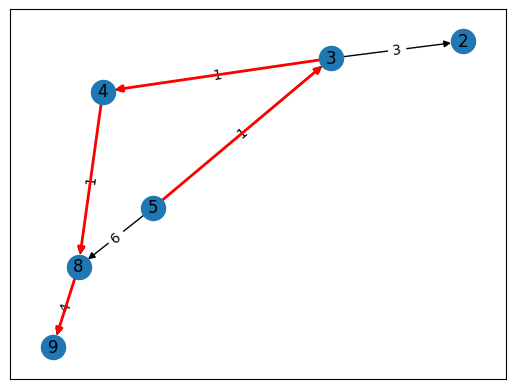

In [45]:
path, distance = UCS(g,initial,goal)
edgelist = [[path[i], path[i+1]] for i in range(len(path)-1)]
print(edgelist)
nx.draw_networkx(G, pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw_networkx_edges(G, pos, edgelist=edgelist, edge_color='r', width=2)
plt.show()